## Statistics Practical Implementation
### Measure Of Central Tendency

1. Mean
2. Median
3. Mode

In [187]:
ages=[23,24,32,45,12,43,67,45,32,56,32,120]

In [188]:
import numpy as np
print(np.mean(ages))
print(np.median(ages))

44.25
37.5


In [189]:
import statistics
print(statistics.mean(ages))
print(statistics.median(ages))

44.25
37.5


In [190]:
import statistics
statistics.mode(ages)

32

<Axes: >

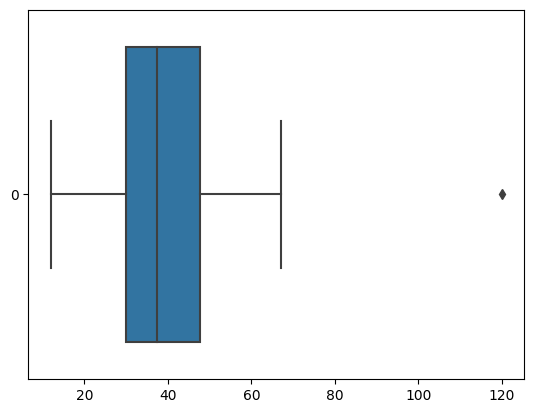

In [191]:
import seaborn as sns
sns.boxplot(ages, orient='h')

## 5 Number Summary

In [192]:
import numpy as np
q1,q3=np.percentile(ages,[25,75])

In [193]:
print(q1,q3)

30.0 47.75


In [194]:
## to check outlier[Lower Fence- Higher fence]
IQR=q3-q1
lower_fence=q1-1.5*(IQR)
higher_fence=q3+1.5*(IQR)
print(lower_fence,higher_fence)

3.375 74.375


## Measure Of Dispersion

1. Variance
2. Standard Deviation

In [195]:
statistics.variance(ages)   # it uses sample variance formula for calculating the variance

795.2954545454545

In [196]:
np.var(ages,axis=0)         # it uses population variance formula for calculating the variance

729.0208333333334

In [197]:
# manually calculate the population variance
def variance(data):
    n=len(ages)
    ## mean of the data
    mean=sum(data)/n
    ## variance
    deviation=[(x - mean) ** 2 for x in data]
    variance=sum(deviation)/n
    return variance

In [198]:
variance(ages)

729.0208333333334

In [199]:
# manually calculate the sample variance
def variance(data):
    n=len(ages)
    ## mean of the data
    mean=sum(data)/n
    ## variance
    deviation=[(x - mean) ** 2 for x in data]
    variance=sum(deviation)/(n-1)
    return variance


In [200]:
variance(ages)

795.2954545454545

In [201]:
def variance(data,dof=0):
    n=len(ages)
    ## mean of the data
    mean=sum(data)/n
    ## variance
    deviation=[(x - mean) ** 2 for x in data]
    variance=sum(deviation)/(n-dof)
    return variance


In [202]:
variance(ages,dof=1)

795.2954545454545

In [203]:
statistics.pvariance(ages)   # Populatuon variance

729.0208333333334

In [204]:
import math
math.sqrt(statistics.pvariance(ages))

27.000385799712813

## Histograms And PDF

<Axes: ylabel='Count'>

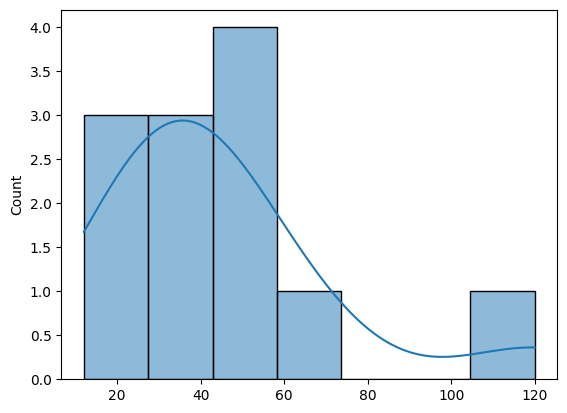

In [205]:
import seaborn as sns
sns.histplot(ages,kde=True)  # kde- kernel density estimator

In [206]:
df=sns.load_dataset('iris')

In [207]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

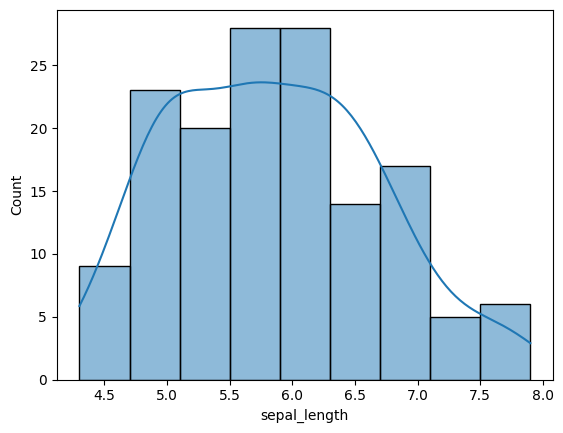

In [208]:
sns.histplot(df['sepal_length'],kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

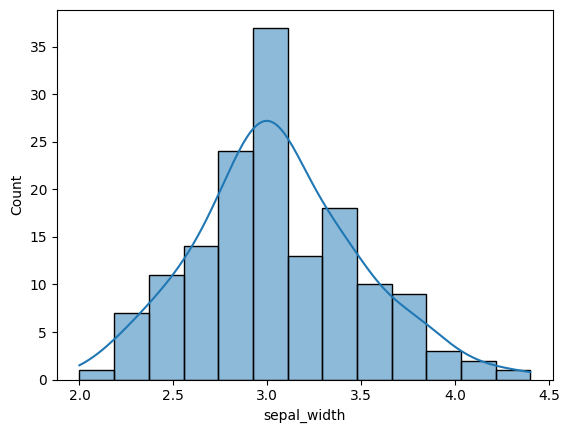

In [209]:
sns.histplot(df['sepal_width'],kde=True)

<Axes: xlabel='petal_length', ylabel='Count'>

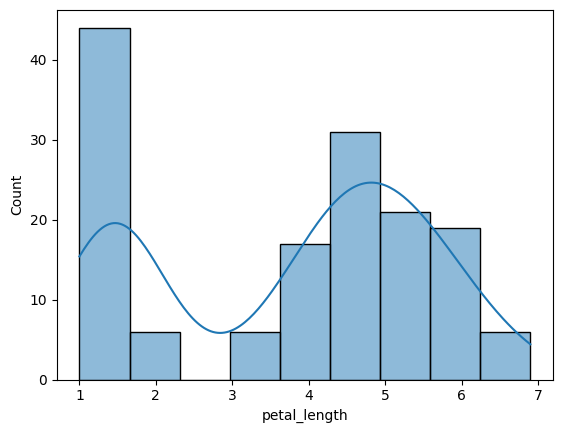

In [210]:
sns.histplot(df['petal_length'],kde=True)

<Axes: xlabel='petal_width', ylabel='Count'>

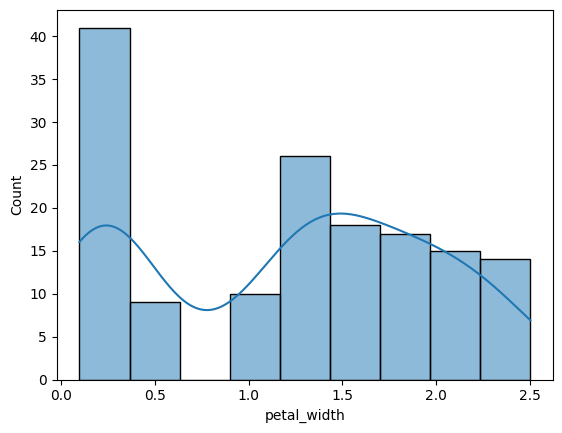

In [211]:
sns.histplot(df['petal_width'],kde=True)

In [212]:
## create a normal distributed data
s=np.random.normal(0.5,0.2,1000)       # 0.5 mean, 0.2 standard deviation and 1000 data points

In [213]:
s

array([ 0.29996464,  0.7557532 ,  0.48244924,  0.3638687 ,  0.78535138,
        0.8697024 ,  0.54550585,  0.329196  ,  0.35792521,  0.29158884,
        0.17333308,  0.69135802,  0.59067882,  0.0734405 ,  0.387137  ,
        0.66097474,  0.8862261 ,  0.46218302,  0.49249879,  0.8180426 ,
        0.96903701,  0.01610812,  0.42148547,  0.6294481 ,  0.70233497,
        0.4244902 ,  0.32930059,  0.39052291,  0.67553605,  0.92285148,
        0.73524831,  0.55186186,  0.46179956,  0.79491417,  0.49484295,
        0.559923  ,  0.67044881,  0.61183824,  0.44275679,  0.55646838,
        0.2962001 ,  0.46852281,  0.54881227,  0.78053773,  0.46965171,
        0.42069322,  0.23885805,  0.03703154,  0.34839567,  0.67583835,
        0.47648778,  0.48861077,  0.54544965,  0.32771522,  0.12457354,
        0.43642081,  0.31247009,  0.72906985,  0.89742352,  0.17562825,
        0.51908592,  0.62807825,  0.5370881 ,  0.33228778,  0.41500391,
        0.94440222,  0.41222219,  0.27964604, -0.09355947,  0.40

<Axes: ylabel='Count'>

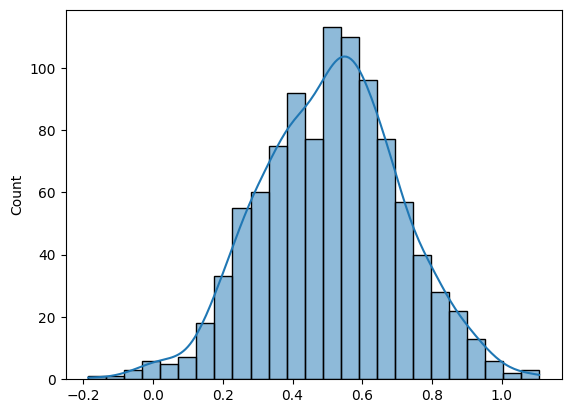

In [214]:
sns.histplot(s,kde=True)

## Other Distribuiton
## Log Normal Distribution,Power Law Distribution

In [215]:
mu, sigma = 3., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 100)

<Axes: ylabel='Count'>

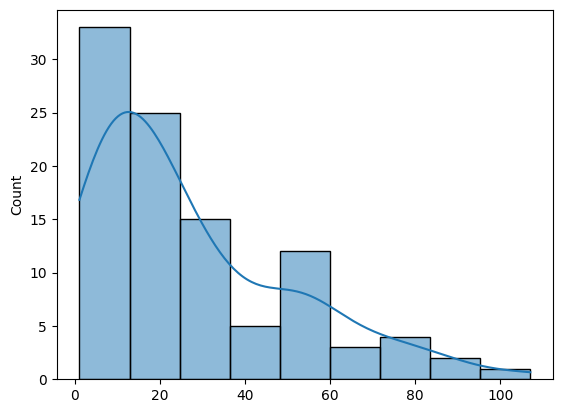

In [216]:
sns.histplot(s,kde=True)

<Axes: ylabel='Count'>

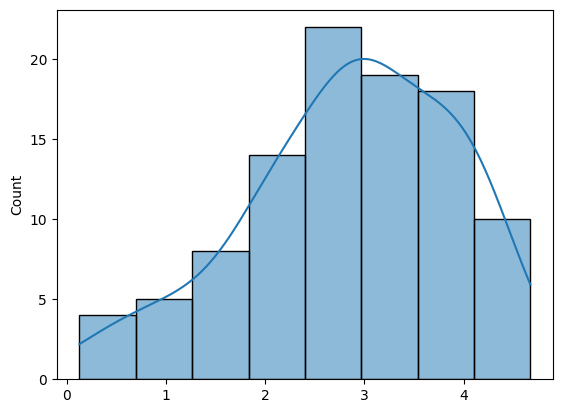

In [217]:
sns.histplot(np.log(s),kde=True)

## Check whether Disstribution is Normal Distribution

In [218]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show()


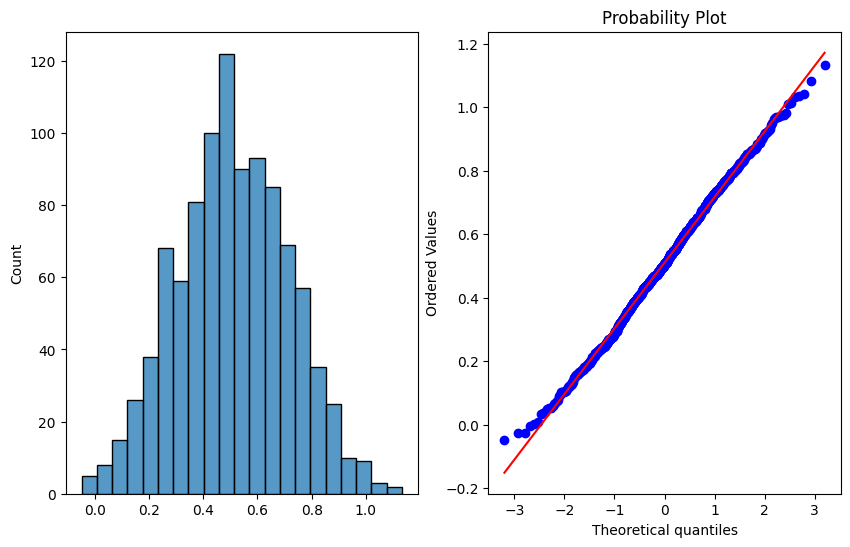

In [219]:
## create a normal distributed data
s=np.random.normal(0.5,0.2,1000)
plot_data(s)

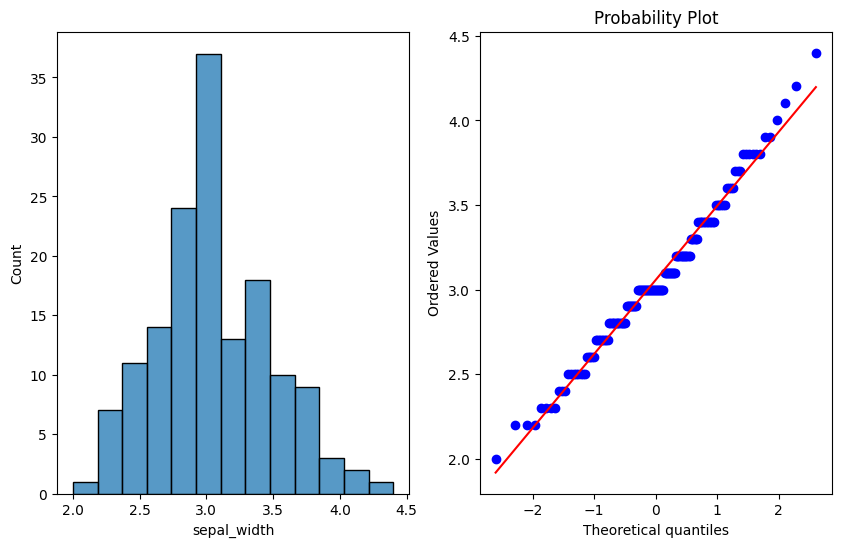

In [220]:
plot_data(df['sepal_width'])

In [221]:
mu, sigma = 3., 1. # mean and standard deviation
sample = np.random.lognormal(mu, sigma, 100)

In [222]:
def plot_data_log(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample),dist='norm',plot=pylab)
    plt.show()

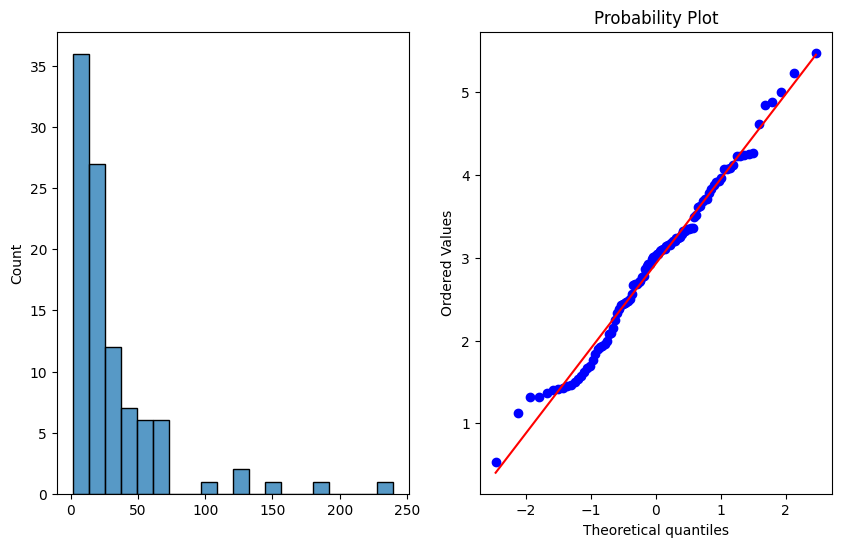

In [223]:
plot_data_log(sample)

# Pearson and Sperman Rank Correlation

In [224]:
df=sns.load_dataset('tips')

In [225]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [226]:
df.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


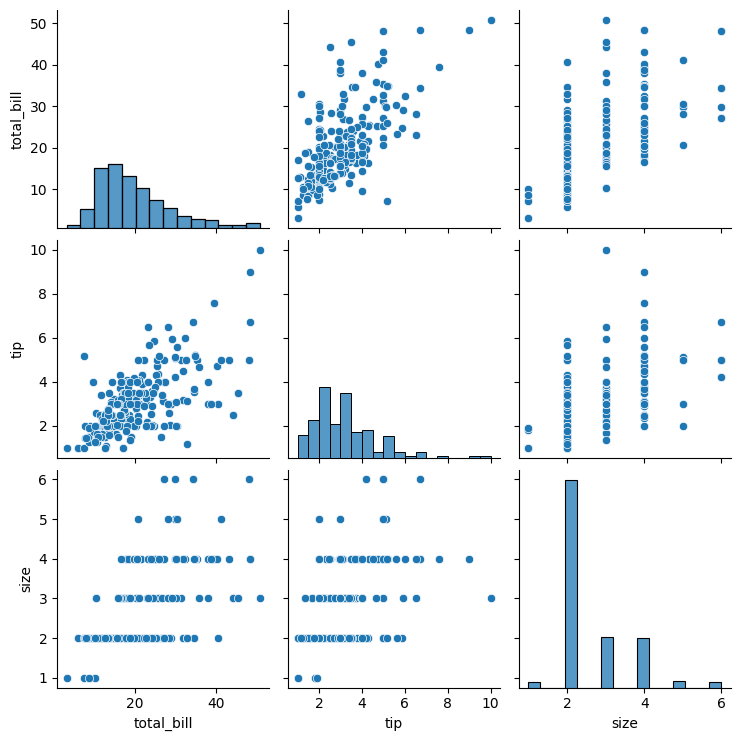

In [228]:
sns.pairplot(df)